('>>', '../script/TT100K_TRAIN_90000.log')
Start Iteration: iteration=     0, loss=24.198600
End   Iteration: iteration= 90000, loss=0.516876
Min test loss > iteration= 57900, loss=0.261000
Max test loss > iteration=     0, loss=24.198600
Top5 min test loss >
iteration= 57900, loss=0.261000
iteration= 81500, loss=0.296756
iteration= 58200, loss=0.311997
iteration= 88800, loss=0.321102
iteration= 61300, loss=0.325104


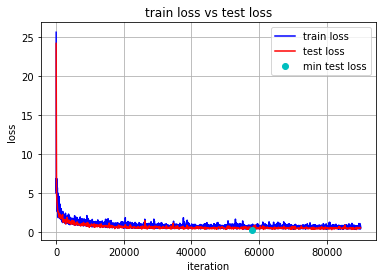

In [4]:
import numpy as np
import re
from cycler import cycler
from matplotlib import pylab as plt
%matplotlib inline

def main():
    #files = ['../script/TT100K_TRAIN_01.log', '../script/TT100K_TRAIN_02.log']
    files = ['../script/TT100K_TRAIN_90000.log']
  
    for i, log_file in enumerate(files):
        loss_iterations, losses, test_loss_iterations, test_losses, min_test_loss_iterations, min_test_losses = parse_log(log_file)
        draw_results(loss_iterations, losses, test_loss_iterations, test_losses, min_test_loss_iterations, min_test_losses, color_ind=i)


def parse_log(log_file):
    with open(log_file, 'r') as log_file:
        log = log_file.read()

    loss_pattern = r"Iteration (?P<iter_num>\d+), loss = (?P<loss_val>[+-]?(\d+(\.\d*)?|\.\d+)([eE][+-]?\d+)?)"
    losses = []
    loss_iterations = []

    for r in re.findall(loss_pattern, log):
        loss_iterations.append(int(r[0]))
        losses.append(float(r[1]))

    loss_iterations = np.array(loss_iterations)
    losses = np.array(losses)

    test_loss_iterations_pattern = r"Iteration (?P<iter_num>\d+), Testing net \(#0\)\n"
    test_loss_pattern = r"Test loss: (?P<loss_val>[+-]?(\d+(\.\d*)?|\.\d+)([eE][+-]?\d+)?)"
    test_losses = []
    test_loss_iterations = []

    for r in re.findall(test_loss_iterations_pattern, log):
        test_loss_iterations.append(int(r))
    
    for r in re.findall(test_loss_pattern, log):
        test_losses.append(float(r[0]))
    
    test_loss_iterations = np.array(test_loss_iterations)
    test_losses = np.array(test_losses)
    
    min_test_loss_index = np.argmin(test_losses)
    max_test_loss_index = np.argmax(test_losses)
    
    top_n = 5
    topn_loss_index = test_losses.argsort()[:top_n]

    print(">>",log_file.name)
    print("Start Iteration: iteration=%6d, loss=%.6f" % (loss_iterations[0], test_losses[0]))
    print("End   Iteration: iteration=%6d, loss=%.6f" % (loss_iterations[-1], test_losses[-1]))
    print("Min test loss > iteration=%6d, loss=%.6f" % (test_loss_iterations[min_test_loss_index], test_losses[min_test_loss_index]) )
    print("Max test loss > iteration=%6d, loss=%.6f" % (test_loss_iterations[max_test_loss_index], test_losses[max_test_loss_index]) )
    print("Top"+str(top_n)+" min test loss >")
    
    for i in topn_loss_index:
        print("iteration=%6d, loss=%.6f" % (test_loss_iterations[i], test_losses[i]) )
    
    min_test_losses = []
    min_test_loss_iterations = []
    
    min_test_loss_iterations.append(test_loss_iterations[min_test_loss_index])
    min_test_losses.append(test_losses[min_test_loss_index])

    return loss_iterations, losses, test_loss_iterations, test_losses, min_test_loss_iterations, min_test_losses


def draw_results(loss_iterations, losses, test_loss_iterations, test_losses, min_test_loss_iterations, min_test_losses, color_ind=0):
    axes_cycle = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    modula = len(axes_cycle)
        
    plt.figure()
    plt.plot(loss_iterations, losses, color=axes_cycle[0], label='train loss')
    plt.plot(test_loss_iterations, test_losses, color=axes_cycle[2], label='test loss')
    plt.plot(min_test_loss_iterations, min_test_losses, 'o', color=axes_cycle[3], label='min test loss')
    plt.xlabel("iteration")
    plt.ylabel("loss")
    plt.title("train loss vs test loss")
    plt.legend()
    plt.grid(True)
    
    plt.show()

if __name__ == '__main__':
    main()